# Classification using Logistic Regression

**In this exercise we have to predict if 'few' or 'many' persons have used a bicycle from all the available numeric features, by working on the 'Bike Sharing in Washington D.C.' dataset**

**Connect to GDrive**

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**Load the libraries**

In [27]:
from sklearn.linear_model import SGDClassifier
from io import StringIO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

**Load the dataset**

In [28]:
dataset=pd.read_csv('/content/gdrive/MyDrive/day.csv')
df=pd.DataFrame(data=dataset)

In [29]:
# Change columns to be more readable
df=df.rename(columns={"dteday": "date", "yr": "year", "mnth": "month", "weekday": "day_of_the_week", "workingday": "working_day",
                      "weathersit": "weather_situation", "temp": "real_temperature", "atemp": "feeling_temperature",
                      "hum": "humidity", "windspeed": "wind_speed", "cnt": "num_of_bikes"})

# Feature Engineering

**Remove unwanted columns**

In [30]:
# Keep only numeric data
df = df.drop(['instant','date','casual','registered'],axis=1)

**Final Dataset**

In [31]:
df

,season,year,month,holiday,day_of_the_week,working_day,weather_situation,real_temperature,feeling_temperature,humidity,wind_speed,num_of_bikes
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


# Model Training

**Split dataset into features and target labels**

In [32]:
X_train = df.drop(['num_of_bikes'], axis = 1)
Y_train = df['num_of_bikes']

**Convert 'num_of_bikes' to categorical data**

In [33]:
Y_train = pd.cut(Y_train,  bins=2, labels=[0, 1])
Y_train

0      0
1      0
2      0
3      0
4      0
      ..
726    0
727    0
728    0
729    0
730    0
Name: num_of_bikes, Length: 731, dtype: category
Categories (2, int64): [0 < 1]

**Visualize 'num_of_bikes' categories with ranges**

In [34]:
df2=pd.DataFrame()
df2['num_of_bikes_ranges'] = pd.cut(x=df['num_of_bikes'], bins=2)
df2['num_of_bikes_categories'] = pd.cut(x=df['num_of_bikes'], bins=2, labels=[0,1])
df2 = df2.drop_duplicates(subset=['num_of_bikes_ranges','num_of_bikes_categories']).sort_values(by=['num_of_bikes_categories']).reset_index(drop=True)
df2

,num_of_bikes_ranges,num_of_bikes_categories
0,"(13.308, 4368.0]",0
1,"(4368.0, 8714.0]",1


**Stochastic Gradient Descent Classifier**

In [35]:
#Save output to a string variable, to manipulate it accordingly
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

In [36]:
learning_rate = 0.001
sgd = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1, average=False, random_state=2000, verbose=1)

In [37]:
p_sum=[]
p2_sum=[]
epochs=15
for epoch in range(epochs):
    model  = sgd.partial_fit(X_train, Y_train, classes=[0, 1])
    Y_predicted  = model.predict(X_train)
    p  = model.decision_function(X_train)
    p_sum.append(p)

In [38]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list  = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

In [39]:
model.coef_

array([[ 0.41036544,  0.7761203 , -0.03892733, -0.06250904, -0.02521997,
        -0.02451254, -0.72474253,  0.3530807 ,  0.30479576, -0.18885806,
        -0.09849415]])

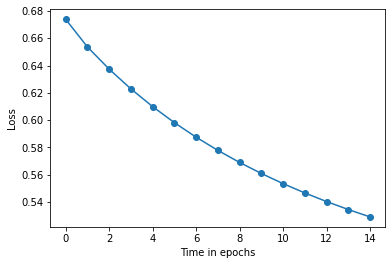

In [40]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

**We choose 'feeling_temperature' as the most prominent feature of the numeric columns**

In [41]:
X_train = df[['feeling_temperature']]

In [42]:
#Save output to a string variable, to manipulate it accordingly
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

In [43]:
learning_rate = 0.001
sgd = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1, average=False, random_state=2000, verbose=1)

In [44]:
p_sum = [];
coef_list=[];
epochs = 15;
for epoch in range(epochs):
    model  = sgd.partial_fit(X_train, Y_train, classes=[0,1])
    Y_predicted  = model.predict(X_train)
    p  = model.decision_function(X_train)
    p_sum.append(p)

In [45]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if (len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

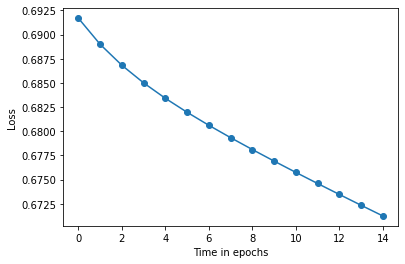

In [46]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
p_sum = np.array(p_sum)
loss_list = np.array(loss_list)
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()